### Perceptron

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.linear_model import Perceptron

In [4]:
iris = load_iris()

In [5]:
X = iris.data[:,(2,3)] # petal length and petal width

In [6]:
y = (iris.target == 0).astype(np.int) # Iris Setosa

In [7]:
per_clf = Perceptron()

In [8]:
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
y_pred = per_clf.predict([[2.5,0.5]])

In [10]:
y_pred

array([0])

### MLP with Keras

In [11]:
import tensorflow as tf

In [12]:
from tensorflow import keras

In [13]:
tf.__version__

'2.0.0'

In [14]:
keras.__version__

'2.2.4-tf'

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [17]:
X_train_full.shape

(60000, 28, 28)

In [18]:
X_train_full.dtype

dtype('uint8')

In [19]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train[0]]

'Coat'

In [22]:
model = keras.Sequential()

In [23]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


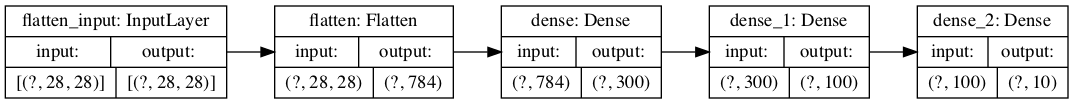

In [28]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,)

In [30]:
model.layers

In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04940578, -0.02783052,  0.01483356, ...,  0.07174394,
        -0.0711653 , -0.06513125],
       [-0.00557442, -0.03177856,  0.01801509, ..., -0.04548601,
        -0.0354766 ,  0.02285996],
       [ 0.04340206, -0.02226761,  0.00204062, ..., -0.01108495,
         0.05940284, -0.0368698 ],
       ...,
       [-0.0688239 , -0.02743622,  0.06371485, ...,  0.00964512,
         0.07300888,  0.03725201],
       [-0.00482503, -0.00884669, -0.00031595, ...,  0.01680797,
         0.06686597, -0.02955016],
       [ 0.06459118,  0.01501787, -0.01082584, ..., -0.06740575,
        -0.00421008,  0.04341315]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.2228 - accuracy: 0.9194 - val_loss: 0.3065 - val_accuracy: 0.8902
Epoch 2/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2196 - accuracy: 0.9208 - val_loss: 0.2943 - val_accuracy: 0.8942
Epoch 3/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2155 - accuracy: 0.9236 - val_loss: 0.2877 - val_accuracy: 0.8946
Epoch 4/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.2115 - accuracy: 0.9238 - val_loss: 0.2928 - val_accuracy: 0.8940
Epoch 5/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.2082 - accuracy: 0.9254 - val_loss: 0.3157 - val_accuracy: 0.8850
Epoch 6/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.2059 - accuracy: 0.9264 - val_loss: 0.2933 - val_accuracy: 0.8932
Epoch 7/30
55000/55000 [============================

In [44]:
import pandas as pd

In [45]:
import matplotlib.pyplot as plt

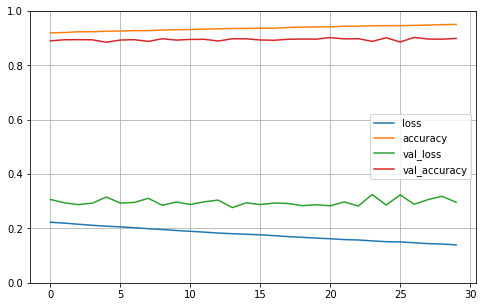

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [47]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[66.50599293966293, 0.862]

In [49]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)